#            Luffy Real Estate- Price predictor



In [1]:
import pandas as pd


In [2]:
housing=pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing.tail()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [6]:
housing.shape

(506, 14)

In [7]:
housing['CHAS'].value_counts()


0    471
1     35
Name: CHAS, dtype: int64

In [8]:
import matplotlib.pyplot as plt

In [9]:
%matplotlib inline


array([[<AxesSubplot: title={'center': 'CRIM'}>,
        <AxesSubplot: title={'center': 'ZN'}>,
        <AxesSubplot: title={'center': 'INDUS'}>,
        <AxesSubplot: title={'center': 'CHAS'}>],
       [<AxesSubplot: title={'center': 'NOX'}>,
        <AxesSubplot: title={'center': 'RM'}>,
        <AxesSubplot: title={'center': 'AGE'}>,
        <AxesSubplot: title={'center': 'DIS'}>],
       [<AxesSubplot: title={'center': 'RAD'}>,
        <AxesSubplot: title={'center': 'TAX'}>,
        <AxesSubplot: title={'center': 'PTRATIO'}>,
        <AxesSubplot: title={'center': 'B'}>],
       [<AxesSubplot: title={'center': 'LSTAT'}>,
        <AxesSubplot: title={'center': 'MEDV'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

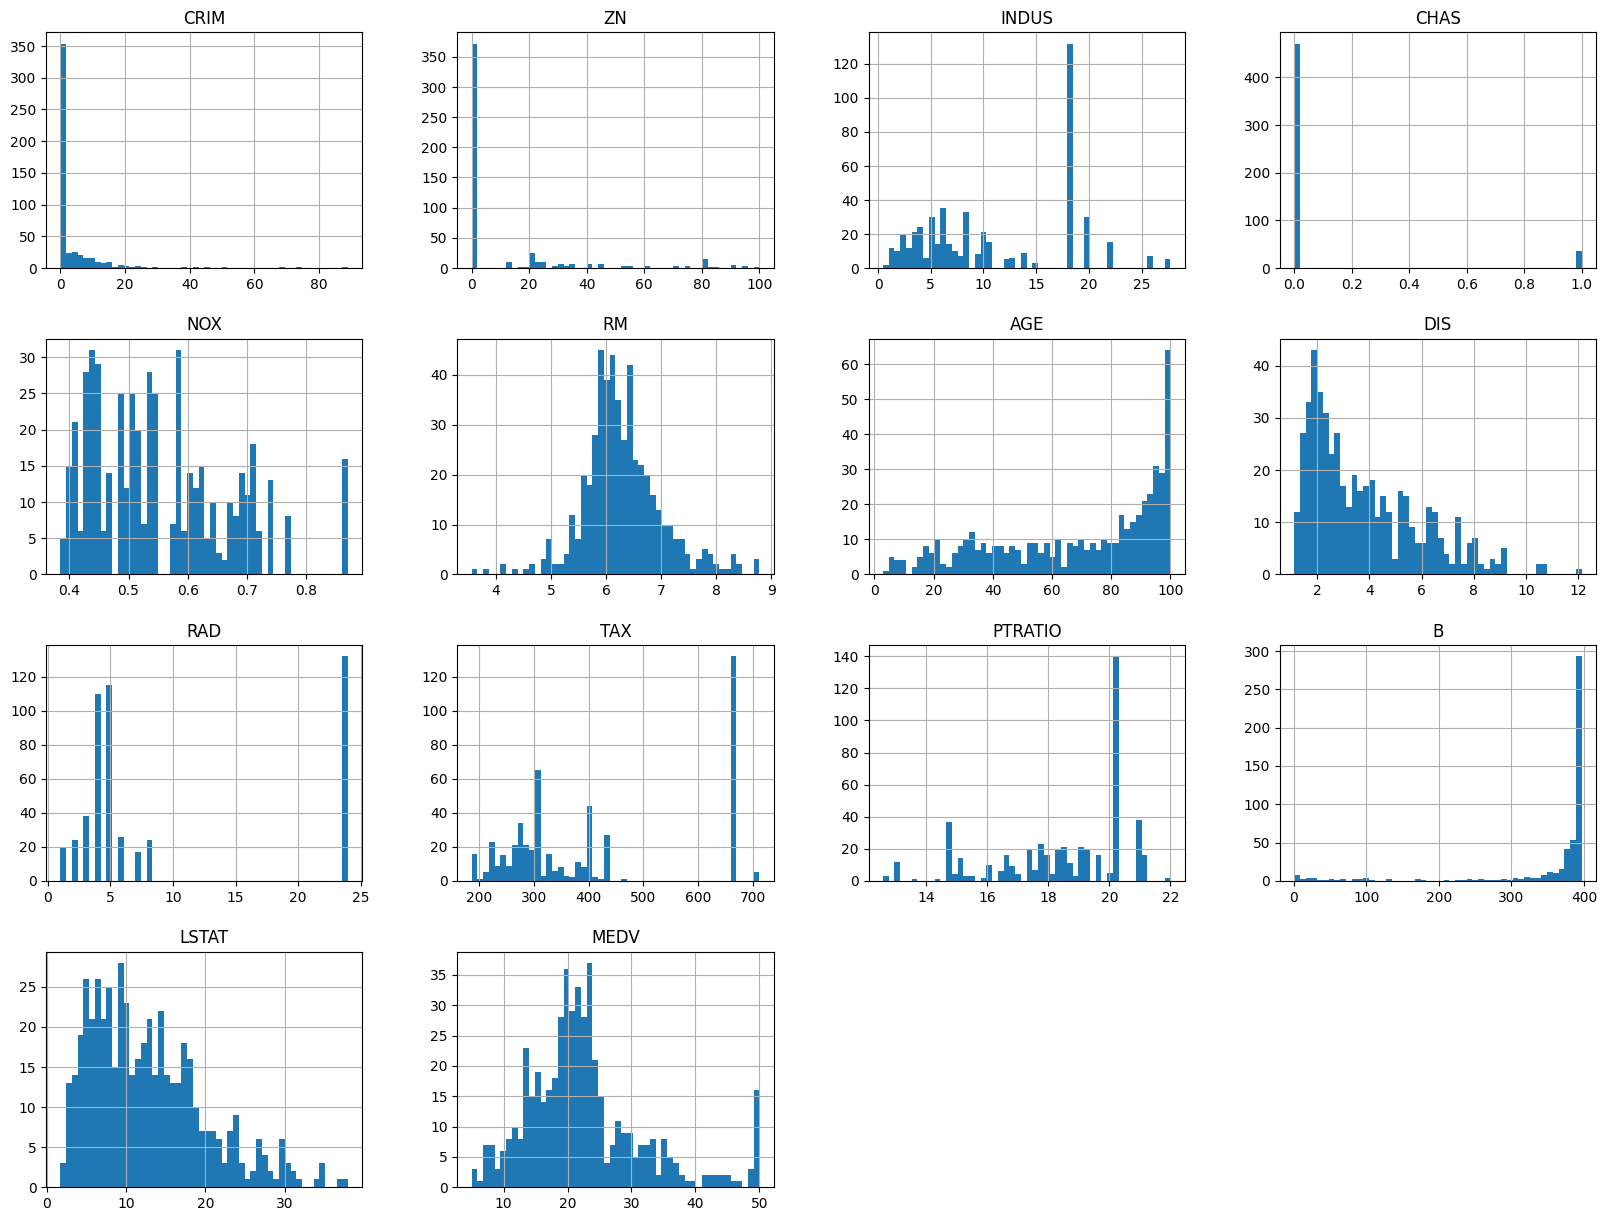

In [10]:
housing.hist(bins=50,figsize=(20,15))

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test=train_test_split(housing,test_size=0.2,random_state=42)

In [13]:
print(f"train rows are:{len(x_train)} ,test rows are: {len(x_test)}")

train rows are:404 ,test rows are: 102


In [14]:
#for better splitting with tain and test data with all kinds of a variety of a important feature -stratifiedshiftshuffle

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit


In [16]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

In [17]:
for train,test in split.split(housing,housing['CHAS']):
    strat_train=housing.loc[train]
    strat_test=housing.loc[test]
    
    

In [18]:
strat_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


In [19]:
strat_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6
466,3.77498,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666,20.2,22.01,17.15,19.0
52,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243,16.8,396.90,5.28,25.0
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27,20.3


In [20]:
strat_test['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [21]:
strat_train['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [22]:
housing=strat_train.copy()

## finding corelation blw the features (mainly features relation with price)
+ve corelated (directly prop)


-ve corelated(indirectly prop)

In [23]:
corr_matrix=housing.corr()

In [24]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679860
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot: xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot: xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot: xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot: xlabel='RM', ylabel='RM'>,
        <AxesSubplot: xlabel='ZN', ylabel='RM'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot: xlabel='RM', ylabel='ZN'>,
        <AxesSubplot: xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

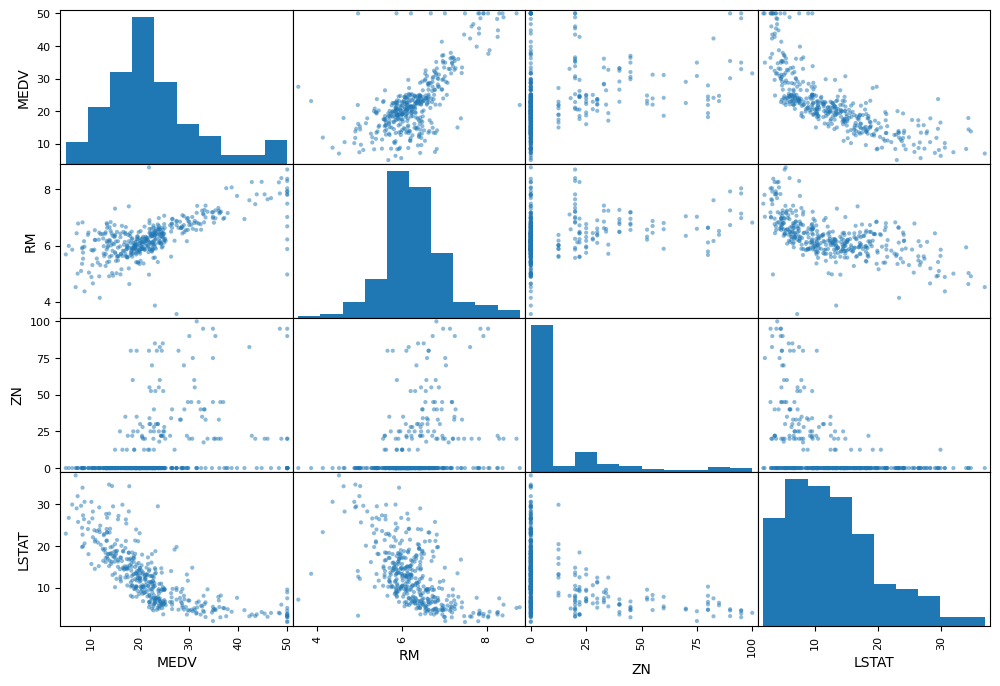

In [25]:
from pandas.plotting import scatter_matrix

attributes=["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

<AxesSubplot: xlabel='RM', ylabel='MEDV'>

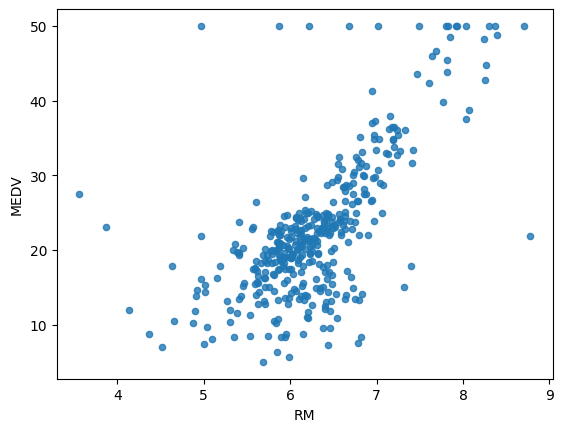

In [26]:
housing.plot(kind='scatter',x='RM',y='MEDV',alpha=0.8)

## trying attribute combinations(atrribute means features)

In [27]:
housing['taxRM']=housing['TAX']/housing['RM']

In [28]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,taxRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [29]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679860
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
taxRM     -0.529920
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot: xlabel='taxRM', ylabel='MEDV'>

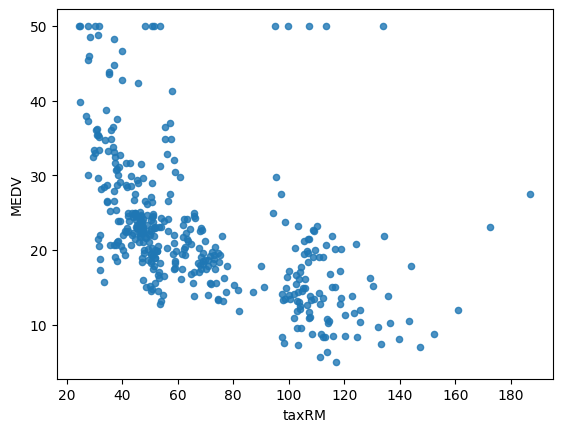

In [30]:
housing.plot(kind='scatter',x="taxRM",y="MEDV",alpha=0.8)

In [31]:
housing=strat_train.drop("MEDV",axis=1)
housing_labels=strat_train["MEDV"].copy()

# #Missing attributes 

In [32]:
#methods to solve the missing value problem
# 1.delete the data point (row that has missing feature data)
#2.delete the entire attritubte or feature 
#3.replace empty space with some value(either or mean or median )


In [33]:
#method 1 the original dataframe(housing )remains unchanged
housing.dropna(subset=['RM'])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13


In [34]:
#method 2 the original dataframe(housing )remains unchanged
housing.drop("RM",axis=1)

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,86.5,2.4358,24,666,20.2,50.92,18.13


In [35]:
#method 3 the original dataframe(housing )remains unchanged

In [36]:
median=housing["RM"].median()

In [37]:
median


6.211

In [38]:
housing['RM'].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [39]:
housing['RM'].shape

(404,)

In [40]:
housing.describe() #before filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.282318,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716876,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.876500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.633000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [41]:
#this filling the empty data in each column can be done through scikit learn

In [42]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy="median")
impute.fit(housing)
X=impute.transform(housing)

In [43]:
impute.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21100e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [44]:
impute.statistics_.shape

(13,)

In [45]:
housing_tr=pd.DataFrame(X,columns=housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281436,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712459,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# Feature scaling


In [46]:
   # it is use to scale down all the data;
    #two types:
     # 1.  MIN- MAX scaling(NORMALIZATION)=>(VALUE-MIN)/(MAX-MIN)
     # sklearn provides MinMaxScaler function for this
     #sklearn provides StandardScaler for this

# Creating pipeline


In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing  import StandardScaler
from sklearn.impute import SimpleImputer
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

In [48]:
hous_n_tr=my_pipeline.fit_transform(housing)


In [49]:
hous_n_tr.shape


(404, 13)

# Selecting a desired model for Luffy Real Estates


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
#model=LinearRegression()
#model=DecisionTreeRegressor()
model.fit(hous_n_tr,housing_labels)

RandomForestRegressor()

In [51]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]

In [52]:
prepared_data=my_pipeline.transform(some_data)

In [53]:
model.predict(prepared_data)

array([22.566, 25.321, 16.325, 23.395, 23.664])

In [54]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [55]:
#MSE(Mea Squared Error)should be minimum (error blw predicted and original)

# Evaluating the model

In [56]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [57]:
house_predictions=model.predict(hous_n_tr)

In [58]:
mse=mean_squared_error(housing_labels,house_predictions)

In [59]:
rmse=np.sqrt(mse)

In [60]:
print(rmse)

1.208955159107513


# using better evaluating technique(error calculation)-Cross valdidation

In [61]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,hous_n_tr,housing_labels,scoring="neg_mean_squared_error")

In [62]:
rmse_scores=np.sqrt(-scores)

In [63]:
rmse_scores

array([2.86834855, 3.59743222, 3.11396801, 4.10988627, 3.18302824])

In [64]:
def print_scores(scores):
    print("scores",scores)
    print("mean",scores.mean())
    print('standard deviation',scores.std())
    

In [65]:
print_scores(rmse_scores)

scores [2.86834855 3.59743222 3.11396801 4.10988627 3.18302824]
mean 3.374532658389723
standard deviation 0.4361695486942012


# saving the model

In [66]:
from joblib import dump, load
dump(model, 'luffy.joblib') 

['luffy.joblib']

# testing the model using testdata

In [67]:
features_test=strat_test.drop("MEDV",axis=1)
labels_test=strat_test["MEDV"].copy()
prep_test=my_pipeline.transform(features_test)

In [68]:
final_predictions=model.predict(prep_test)

In [69]:
final_mse=mean_squared_error(labels_test,final_predictions)
final_rmse=np.sqrt(final_mse)
print(list(final_predictions),list(labels_test))

[25.021, 11.107999999999993, 26.016000000000012, 22.176, 18.305999999999994, 14.876999999999999, 19.786999999999995, 14.359999999999989, 31.965999999999994, 41.205, 19.551000000000002, 11.429999999999989, 24.103, 25.347999999999985, 19.305999999999994, 10.868999999999994, 31.204000000000004, 14.196000000000005, 23.796999999999976, 17.86599999999999, 20.147999999999982, 17.296000000000003, 16.613999999999994, 22.264999999999997, 18.824999999999992, 31.943000000000005, 15.996000000000011, 33.553, 9.077000000000002, 33.114999999999995, 23.89699999999998, 21.422000000000004, 22.82399999999999, 10.42599999999999, 21.072999999999983, 11.317999999999993, 42.67800000000002, 24.30099999999999, 23.939999999999994, 42.18300000000003, 24.130000000000006, 29.36700000000001, 20.62300000000001, 20.879999999999995, 18.396999999999988, 32.44999999999999, 45.18500000000004, 20.269, 20.206999999999983, 21.967, 20.865, 14.765999999999996, 21.454, 14.690999999999997, 25.206000000000007, 32.20599999999996, 

In [70]:
final_rmse

3.0246819926833206

# usage of the model

In [71]:
from joblib import dump,load 
model=load('luffy.joblib')

In [72]:
prepared_data[[0]]

array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
        -0.24373445, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
        -0.97491834,  0.41164221, -0.86091034]])

In [76]:
features= np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
        -10.4373445, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
        -0.97491834,  0.41164221, -0.86091034]])

In [77]:
model.predict(features)

array([21.985])